In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

## Step 1 - Preprocessing

In [5]:
# Import & visualize dataset
df = pd.read_csv("./assets/data_warehouse/salaries_4_model.csv", delimiter=";", decimal=",")
df.head() 
df.dtypes

JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
PensionDebt         float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [6]:
df1 = df[df["TotalPayBenefits"] < 42500]
df2 = df[df["TotalPayBenefits"] >= 42500]

### Comment about the code below 
* Rather than creating a function that would manage both the `df1` and `df2` subsets we simply duplicated the code (see `projet_3_modeling.ipynb`)
* We know, this is error prone and not a best practice
* Refactoring this part of the code is on the TO DO list however.

In [7]:
print(df1.head())
print(df2.head())

                                  JobTitle   BasePay  OvertimePay  OtherPay  \
26377                            CUSTODIAN  39385.00         0.00   3113.52   
26378                      GENERAL LABORER  42467.95         0.00      0.00   
26379  MENTAL HEALTH REHABILITATION WORKER  41735.20       478.80    250.00   
26380               PUBLIC SERVICE TRAINEE  42463.65         0.00      0.00   
26381                  PHARMACY TECHNICIAN  39944.31      2483.91     28.19   

       Benefits  TotalPay  PensionDebt  TotalPayBenefits  Year  
26377       0.0  42498.52          0.0          42498.52  2011  
26378       0.0  42467.95          0.0          42467.95  2011  
26379       0.0  42464.00          0.0          42464.00  2011  
26380       0.0  42463.65          0.0          42463.65  2011  
26381       0.0  42456.41          0.0          42456.41  2011  
                                         JobTitle    BasePay  OvertimePay  \
0  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.

In [8]:
print(df1.shape)
print(df2.shape)

(101311, 9)
(375202, 9)


In [9]:
# Describe dataset's main statistics
print(df1.describe(include="all"))
print(df2.describe(include="all"))

             JobTitle        BasePay    OvertimePay       OtherPay  \
count          101311  101311.000000  101311.000000  101311.000000   
unique           1255            NaN            NaN            NaN   
top     SPECIAL NURSE            NaN            NaN            NaN   
freq            10202            NaN            NaN            NaN   
mean              NaN   10712.641433     258.202960     752.660122   
std               NaN    9477.626021     948.989481    2514.620091   
min               NaN    -474.400000    -292.800000    -618.130000   
25%               NaN    2529.280000       0.000000       0.000000   
50%               NaN    8416.740000       0.000000      15.430000   
75%               NaN   17121.650000       0.000000     384.435000   
max               NaN   42467.950000   33176.650000   41766.140000   

             Benefits       TotalPay    PensionDebt  TotalPayBenefits  \
count   101311.000000  101311.000000  101311.000000     101311.000000   
unique       

In [10]:
# Separate target variable y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = ["BasePay", "OvertimePay", "OtherPay", "Benefits", "TotalPay", "PensionDebt", "Year" ]

X1 = df1.loc[:,features_list] # We add feature_list into our loc 
y1 = df1.loc[:,"TotalPayBenefits"] # We set "TotalPayBenefits" as the target variable

X2 = df2.loc[:,features_list] 
y2 = df2.loc[:,"TotalPayBenefits"] 

print("...Done.")

Separating target variable from features...
...Done.


In [11]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size=0.2, 
                                                    random_state=0)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size=0.2, 
                                                    random_state=0)
print("...Done.")                                                                

Splitting dataset into train set and test set...
...Done.


In [12]:
### Training pipeline ###
print("X1_train before preprocessing")
print(X1_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")

numeric_features1 = [0,1,2,3,4,5]           # Indexes of the colums to be scaled
numeric_transformer1 = StandardScaler()

categorical_features1 = [6] 
categorical_transformer1 = OneHotEncoder()

# Create a pipeline 
feature_encoder1 = ColumnTransformer(
    transformers =[
        ('cat', categorical_transformer1, categorical_features1),    
        ('num', numeric_transformer1, numeric_features1)
        ]
    )

X1_train = feature_encoder1.fit_transform(X1_train)
print("...Done.")
print("X1_train after preprocessing")
print(X1_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)

X1_train before preprocessing
         BasePay  OvertimePay  OtherPay  Benefits  TotalPay  PensionDebt  Year
67011   13223.52          0.0    727.21   5535.68  13950.73          0.0  2012
67101   15752.81          0.0    314.80   2881.09  16067.61          0.0  2012
107247   7054.54          0.0      0.00     70.55   7054.54          0.0  2013
396870   1892.73          0.0    148.46      0.00   2041.19          0.0  2020
103953  19918.02          0.0    334.73      0.00  20252.75          0.0  2013

Encoding categorical features and standardizing numerical features...
...Done.
X1_train after preprocessing
[[ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.26693089 -0.26954326 -0.00864855  0.86550596  0.22475688 -0.04169174]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.53412163 -0.26954326 -0.17296287  0.1522723

In [13]:
### Training pipeline ###
print("X2_train before preprocessing")
print(X2_train.head())

numeric_features2 = [0,1,2,3,4,5]           # Indexes of the colums to be scaled
numeric_transformer2 = StandardScaler()

categorical_features2 = [6] 
categorical_transformer2 = OneHotEncoder()

feature_encoder2 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer2, categorical_features2),    
        ('num', numeric_transformer2, numeric_features2)
        ]
    )

X2_train = feature_encoder2.fit_transform(X2_train)
print("...Done.")
print("X2_train after preprocessing")
print(X2_train[0:5,:]) 

X2_train before preprocessing
          BasePay  OvertimePay  OtherPay  Benefits   TotalPay  PensionDebt  \
218489   32780.21        63.15   4431.75  17191.93   37275.11         0.00   
398608  165973.06    102549.19  35007.96  60572.25  303530.21      7505.33   
284812  103985.61         0.00      0.00  35901.73  103985.61         0.00   
76702   112328.00     30021.90  10423.88  35358.10  152773.78         0.00   
297487   65754.06       141.13      0.00  27335.76   65895.19         0.00   

        Year  
218489  2016  
398608  2021  
284812  2018  
76702   2013  
297487  2018  
...Done.
X2_train after preprocessing
[[ 0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
  -1.49484044 -0.49104366 -0.01514034 -0.98171642 -1.3999604  -0.15778072]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   1.78399009  5.71453925  3.62952

## Step 2 - Build the model


In [14]:
# Train model
print("Train model...")
regressor1 = LinearRegression()
regressor1.fit(X1_train, y1_train) 
print("...Done.")

Train model...
...Done.


In [15]:
# Train model
print("Train model...")
regressor2 = LinearRegression()
regressor2.fit(X2_train, y2_train) 
print("...Done.")

Train model...
...Done.


Test our model and see its predictions 

In [16]:
# Predictions on training set
print("Predictions on training set...")
y1_train_pred = regressor1.predict(X1_train)
print("...Done.")
print(y1_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[19486.41 18948.7   7125.09  2041.19 20252.75]



In [17]:
# Predictions on training set
print("Predictions on training set...")
y2_train_pred = regressor2.predict(X2_train)
print("...Done.")
print(y2_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[ 54467.04 371607.79 139887.34 188131.88  93230.95]



Apply the exact same process on the test set and compare performances. 

In [18]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X1_test)
print()

X1_test = feature_encoder1.transform(X1_test)

print("...Done.")
print(X1_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

--- Testing pipeline ---
Standardizing numerical features...
         BasePay  OvertimePay  OtherPay  Benefits  TotalPay  PensionDebt  Year
473359  12427.99         0.00      0.00      0.00  12427.99          0.0  2022
391969  22834.62         0.00      0.00  12395.45  22834.62          0.0  2020
141807  13550.08        80.44     12.69   6527.35  13643.21          0.0  2014
470978  20977.41         0.00   3418.26   8007.39  24395.67          0.0  2022
434355   8608.20         0.00    730.00      0.00   9338.20          0.0  2021
...          ...          ...       ...       ...       ...          ...   ...
146937   2597.20         0.00      0.00     25.97   2597.20          0.0  2014
185203   5269.23         0.00      0.00     52.69   5269.23          0.0  2015
31389   10623.70         0.00     52.43      0.00  10676.13          0.0  2011
395695   4059.36         0.00    190.25    856.58   4249.61          0.0  2020
305865  16659.35         0.00    240.00   7703.21  16899.35          0

In [19]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X2_test)
print()

X2_test = feature_encoder2.transform(X2_test)

print("...Done.")
print(X2_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

--- Testing pipeline ---
Standardizing numerical features...
          BasePay  OvertimePay  OtherPay  Benefits   TotalPay  PensionDebt  \
293896   74236.73         0.00   1338.60  29190.56   75575.33          0.0   
292790   76087.48       224.05   2655.96  30007.97   78967.49          0.0   
196075  122281.90        86.94   3244.90  35621.41  125613.74          0.0   
127636   67948.00      4112.39   5702.08  29901.07   77762.47          0.0   
389625   65264.75         0.00      0.00      0.00   65264.75          0.0   
...           ...          ...       ...       ...        ...          ...   
251605   72704.08       899.36      0.00  28197.38   73603.44          0.0   
218661   37705.75         0.00   3015.52  12065.36   40721.27          0.0   
57979    59835.35         0.00    681.85  28089.01   60517.20          0.0   
89189    80133.01       553.88      0.00  29589.38   80686.89          0.0   
58834    56237.06         0.00   1020.00  28528.12   57257.06          0.0   

  

In [20]:
# Predictions on test set
print("Predictions on test set...")
y1_test_pred = regressor1.predict(X1_test)
print("...Done.")
print(y1_test_pred[:5])
print()

Predictions on test set...
...Done.
[12427.99 35230.07 20170.56 32403.06  9338.2 ]



In [21]:
# Predictions on test set
print("Predictions on test set...")
y2_test_pred = regressor2.predict(X2_test)
print("...Done.")
print(y2_test_pred[:5])
print()

Predictions on test set...
...Done.
[104765.89 108975.46 161235.15 107663.54  65264.75]



## Step 3 - Evaluate the model

In [22]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor1.score(X1_train, y1_train))
print("R2 score on test set     : ", regressor1.score(X1_test, y1_test))

--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set     :  1.0


In [23]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor2.score(X2_train, y2_train))
print("R2 score on test set     : ", regressor2.score(X2_test, y2_test))

--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set     :  1.0


## Step 4 - Feature importance

* Check which features are important
* Check out model's coefficients! 


In [24]:
print("coefficients are: ", regressor1.coef_) 
print("Constant is: ", regressor1.intercept_)

coefficients are:  [ -165.13674372  -165.13674372  -165.13674372  -165.13674372
  -165.13674372  -165.13674372  -165.13674372  -165.13674372
  -165.13674372  -165.13674372  -165.13674372  -165.13674372
 10297.3841578   1028.31297996  2730.25665524  3721.90794868
  -879.09095716    23.41283242]
Constant is:  14180.868806570988


In [25]:
print("coefficients are: ", regressor2.coef_) 
print("Constant is: ", regressor2.intercept_)

coefficients are:  [ 4450.77619656  4450.77619656  4450.77619656  4450.77619656
  4450.77619656  4450.77619656  4450.77619656  4450.77619656
  4450.77619656  4450.77619656  4450.77619656  4450.77619656
 39819.69844175 16188.93041135  8223.60595723 14428.64094698
   972.95020833   945.4525238 ]
Constant is:  133290.43883867122


Now that we have the coefficients, we need to know which columns are associated with each one. If you look at `X_train` (or `X_test`), here is what you have:

In [26]:
X1_train[:5] # Visualize the first 5 rows of your X_train

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.26693089, -0.26954326, -0.00864855,
         0.86550596,  0.22475688, -0.04169174],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.53412163, -0.26954326, -0.17296287,
         0.15227231,  0.43618602, -0.04169174],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.38475174, -0.26954326, -0.29838695,
        -0.60286189, -0.46401884, -0.04169174],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        , -0.93003829, -0.269

In [27]:
X2_train[:5] # Visualize the first 5 rows of your X_train

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -1.49484044, -0.49104366, -0.01514034,
        -0.98171642, -1.3999604 , -0.15778072],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.78399009,  5.71453925,  3.62952272,
         2.02482593,  4.00528456,  7.78056606],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.25803473, -0.49486742, -0.54340188,
         0.31499615, -0.04567049, -0.15778072],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.46340073,  1.322

* Can we show it in a DataFrame? 
* We need to use the `.categories_` attribute from `OneHotEncoder` 
* Since we use `ColumnTransformer`, we need to access `OneHotEncoder` using `.transformers_` 

In [28]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder1.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder1.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(), [6]), ('num', StandardScaler(), [0, 1, 2, 3, 4, 5])]
One Hot Encoder transformer is:  OneHotEncoder()


In [29]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder2.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder2.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(), [6]), ('num', StandardScaler(), [0, 1, 2, 3, 4, 5])]
One Hot Encoder transformer is:  OneHotEncoder()


Now we can check the categories

In [30]:
# Print categories
categorical_column_names = feature_encoder1.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)]


In [31]:
# Print categories
categorical_column_names = feature_encoder2.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)]


Now we can concatenate them with the numerical column names. We will use `numeric_features` variable to determine the name of our columns

In [32]:
numerical_column_names = X1.iloc[:, numeric_features1].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'PensionDebt'],
      dtype='object')


In [33]:
numerical_column_names = X2.iloc[:, numeric_features2].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'PensionDebt'],
      dtype='object')


Finally, we need to concatenate our `numerical_column_names` and our `categorical_column_names`. The easiest way to do it is by using [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html)

In [34]:
# Append the columns 
all_column_names1 = np.append(categorical_column_names, numerical_column_names)
all_column_names1

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'PensionDebt'], dtype=object)

In [35]:
# Append the columns 
all_column_names2 = np.append(categorical_column_names, numerical_column_names)
all_column_names2

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'PensionDebt'], dtype=object)

Rank columns by importance using coefficients

In [36]:
# Feature importance 
feature_importance1 = pd.DataFrame({
    "feature_names": all_column_names1,
    "coefficients":regressor1.coef_
})
feature_importance1

,feature_names,coefficients
0,2011,-165.136744
1,2012,-165.136744
2,2013,-165.136744
3,2014,-165.136744
4,2015,-165.136744
5,2016,-165.136744
6,2017,-165.136744
7,2018,-165.136744
8,2019,-165.136744
9,2020,-165.136744


In [37]:
# Feature importance 
feature_importance2 = pd.DataFrame({
    "feature_names": all_column_names2,
    "coefficients":regressor2.coef_
})
feature_importance2

,feature_names,coefficients
0,2011,4450.776197
1,2012,4450.776197
2,2013,4450.776197
3,2014,4450.776197
4,2015,4450.776197
5,2016,4450.776197
6,2017,4450.776197
7,2018,4450.776197
8,2019,4450.776197
9,2020,4450.776197


<!-- Now you know that you model is: 

$y=23904\times YearsExperience + 2472 \times UK - 2182 \times Germany  -290\times France + 73498$

You can be very fancy and try to use `seaborn` to visualize feature importance 🌟 -->

c:\Users\phili\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


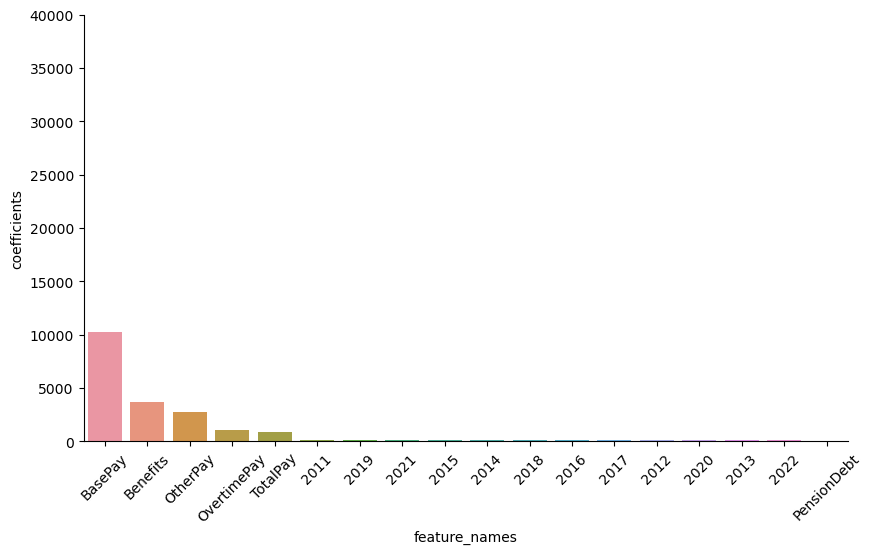

In [38]:
# Set coefficient to absolute values to rank features
feature_importance1["coefficients"] = feature_importance1["coefficients"].abs()

# Visualize ranked features using seaborn
_ = sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance1.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9,
            ) # Resize graph
_ = plt.xticks(rotation=45)
_ = plt.ylim(0, 40000)

c:\Users\phili\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


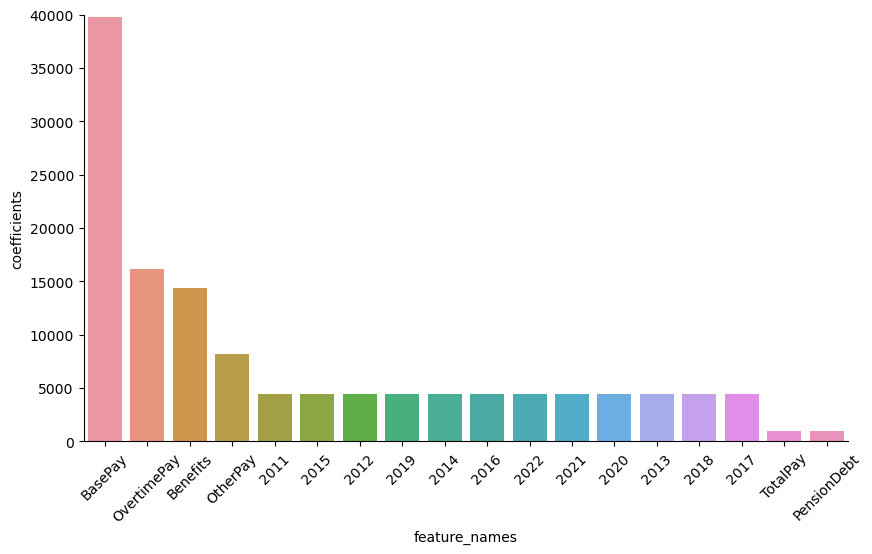

In [40]:
# Set coefficient to absolute values to rank features
feature_importance2["coefficients"] = feature_importance2["coefficients"].abs()

# Visualize ranked features using seaborn

_ = sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance2.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph
_ = plt.xticks(rotation=45)
_ = plt.ylim(0, 40000)

In [43]:
feature_importance1 = feature_importance1.sort_values(by="coefficients", ascending=False)
feature_importance1

,feature_names,coefficients
12,BasePay,10297.384158
15,Benefits,3721.907949
14,OtherPay,2730.256655
13,OvertimePay,1028.312980
16,TotalPay,879.090957
0,2011,165.136744
8,2019,165.136744
10,2021,165.136744
4,2015,165.136744
3,2014,165.136744


In [44]:
feature_importance2 = feature_importance2.sort_values(by="coefficients", ascending=False)
feature_importance2

,feature_names,coefficients
12,BasePay,39819.698442
13,OvertimePay,16188.930411
15,Benefits,14428.640947
14,OtherPay,8223.605957
0,2011,4450.776197
4,2015,4450.776197
1,2012,4450.776197
8,2019,4450.776197
3,2014,4450.776197
11,2022,4450.776197


## Step 5 - What does it means ?

### 5.1 Equations

#### Group 1

$$ y = 10294 \times BasePay + 3721 \times Benefits + 2730 \times OtherPay ...$$

#### Group 2

$$y = 39819 \times BasePay + 16188 \times OvertimePay + 14428 \times Benefits ...$$

### 5.2 - CAGR (compound annual growth rate) for both Group

In [117]:
def GetCAGR_2011_2022(Group)->float:
  my_df = pd.DataFrame()
  for yr in range (2011, 2022+1):
    current_df = Group[Group["Year"] == yr]
    current_mean = current_df["TotalPayBenefits"].mean()
    my_df.insert(0, yr, [current_mean])
  
  my_cagr = (my_df[2022].iloc[0]/my_df[2011].iloc[0])**(1.0/11)-1
  return my_cagr

cagr = GetCAGR_2011_2022(df1)
print(f"Group 1, CAGR = {cagr*100:.2f}%", )

cagr = GetCAGR_2011_2022(df2)
print(f"Group 2, CAGR = {cagr*100:.2f}%", )


Group 1, CAGR = 0.28%
Group 2, CAGR = 5.45%


This means that 
* Every year, from 2011 to 2022
* The raise in Group 1 was 0.28% per year
* While the raise in Group 2 was 5.45% per year


### 5.2 - List of the JobTitle per group

In [47]:
df1.insert(0, "Id", list(range(1, len(df1) + 1)))

In [75]:
df1["JobTitle"] = df1["JobTitle"].str.upper()
list_of_names1 = df1.groupby("JobTitle")["Id"].nunique()

print("Group 1 : ")
print(list_of_names1.head(10))
print("\nNumber of uniques job title : ", len(list_of_names1))

Group 1 : 
JobTitle
ACCOUNT CLERK               171
ACCOUNTANT                    1
ACCOUNTANT I                  5
ACCOUNTANT II                42
ACCOUNTANT III               89
ACCOUNTANT INTERN           143
ACCOUNTANT IV                43
ADM, SFGH MEDICAL CENTER      1
ADMIN ANALYST 3               3
ADMIN HEARING EXAMINER       40
Name: Id, dtype: int64

Number of uniques job title :  1255


C:\Users\phili\AppData\Local\Temp\ipykernel_16408\2842789977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["JobTitle"] = df1["JobTitle"].str.upper()


In [49]:
df2.insert(0, "Id", list(range(1, len(df2) + 1)))

In [53]:
df2["JobTitle"] = df2["JobTitle"].str.upper()
list_of_names2 = df2.groupby("JobTitle")["Id"].nunique()

print("Group 2 : ")
print(list_of_names2.head(10))
print("\nNumber of uniques job title : ", len(list_of_names2))

Group 2 : 
JobTitle
ACCOUNT CLERK                    635
ACCOUNTANT                         4
ACCOUNTANT I                      14
ACCOUNTANT II                    632
ACCOUNTANT II (OCII)               3
ACCOUNTANT III                  1268
ACCOUNTANT III (OCII)              2
ACCOUNTANT INTERN                189
ACCOUNTANT IV                    692
ACCOUNTING SUPERVISOR (OCII)       3
Name: Id, dtype: int64

Number of uniques job title :  1760


C:\Users\phili\AppData\Local\Temp\ipykernel_16408\283204350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["JobTitle"] = df2["JobTitle"].str.upper()


### 5.3 - JobTitle per group per year

In [58]:
# Build a dataframe with, per year, the numbers of JobTitle
my_df1 = pd.DataFrame()
for yr in range (2022, 2011-1, -1):
  current_df = df1[df1["Year"] == yr]
  current_series = current_df.groupby("JobTitle")["Id"].nunique()
  current_series = current_series.sort_values(ascending=False)
  current_series = current_series.rename(yr)
  my_df1 = pd.concat([my_df1, current_series], axis=1)

my_df1.sort_values(by=[2022], ascending=False, inplace=True)

print("Group 1 : ")
print(my_df1.head(20))


Group 1 : 
                                 2022   2021   2020    2019   2018   2017  \
PUBLIC SERVICE TRAINEE          587.0  439.0  521.0   783.0  808.0  940.0   
TRANSIT OPERATOR                517.0  398.0  310.0   762.0  402.0  360.0   
RECREATION LEADER               436.0  322.0  555.0   746.0  758.0  677.0   
JUNIOR CLERK                    243.0  278.0  394.0   216.0  269.0   16.0   
SCHOOL CROSSING GUARD           206.0  205.0  200.0   219.0  217.0  241.0   
PUBLIC SVC AIDE-PUBLIC WORKS    159.0  166.0  208.0   379.0  482.0  511.0   
SPECIAL NURSE                   148.0  166.0  937.0  1028.0  944.0  985.0   
CLERK                           146.0  175.0  327.0   205.0  138.0   59.0   
STDNTDSGNTRAIN1, ARCH/ENG/PLNG  119.0   71.0   59.0   182.0  189.0  195.0   
CAMP ASSISTANT                  111.0    NaN    NaN   132.0  108.0  107.0   
CUSTODIAN                        95.0  101.0  105.0   179.0  120.0  149.0   
POOL LIFEGUARD                   86.0   82.0   97.0   133.0  136.

In [57]:
# Build a dataframe with, per year, the numbers of JobTitle
my_df2 = pd.DataFrame()
for yr in range (2022, 2011-1, -1):
  current_df = df2[df2["Year"] == yr]
  current_series = current_df.groupby("JobTitle")["Id"].nunique()
  current_series = current_series.sort_values(ascending=False)
  current_series = current_series.rename(yr)
  my_df2 = pd.concat([my_df2, current_series], axis=1)

my_df2.sort_values(by=[2022], ascending=False, inplace=True)

print("Group 2 : ")
print(my_df2.head(20))


Group 2 : 
                                 2022    2021    2020    2019    2018    2017  \
TRANSIT OPERATOR               2117.0  2116.0  2298.0  2361.0  2339.0  2360.0   
REGISTERED NURSE               1442.0  1463.0  1461.0  1404.0  1367.0  1340.0   
POLICE OFFICER 3                911.0   887.0   811.0   789.0   745.0   693.0   
FIREFIGHTER                     794.0   816.0   832.0   843.0   880.0   860.0   
CUSTODIAN                       743.0   746.0   751.0   738.0   734.0   702.0   
PATIENT CARE ASSISTANT          511.0   512.0   519.0   491.0   492.0   497.0   
EMT/PARAMEDIC/FIREFIGHTER       488.0   412.0   405.0   400.0   400.0   378.0   
SERGEANT 3                      463.0   493.0   497.0   498.0   452.0   438.0   
HSA SR ELIGIBILITY WORKER       448.0   492.0   495.0   512.0   499.0   509.0   
ATTORNEY (CIVIL/CRIMINAL)       405.0   394.0   400.0   408.0   398.0   384.0   
SPECIAL NURSE                   386.0   338.0   621.0   641.0   683.0   685.0   
SENIOR ADMINISTRA

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,PensionDebt,TotalPayBenefits,Year
14327,14328,PUBLIC SERVICE TRAINEE,58920.48,20848.54,624.00,0.00,80393.02,0.0,80393.02,2011
19731,19732,PUBLIC SERVICE TRAINEE,64057.00,0.00,0.00,0.00,64057.00,0.0,64057.00,2011
20839,20840,PUBLIC SERVICE TRAINEE,58708.58,0.00,1915.90,0.00,60624.48,0.0,60624.48,2011
21485,21486,PUBLIC SERVICE TRAINEE,58708.63,0.00,211.88,0.00,58920.51,0.0,58920.51,2011
21486,21487,PUBLIC SERVICE TRAINEE,58920.47,0.00,0.00,0.00,58920.47,0.0,58920.47,2011
...,...,...,...,...,...,...,...,...,...,...
470038,375044,PUBLIC SERVICE TRAINEE,31773.52,5116.98,285.37,7190.76,37175.87,0.0,44366.63,2022
470106,375112,PUBLIC SERVICE TRAINEE,30290.00,0.00,0.00,13253.47,30290.00,0.0,43543.47,2022
470134,375140,PUBLIC SERVICE TRAINEE,23643.29,4559.45,170.70,14884.90,28373.44,0.0,43258.34,2022
470151,375157,PUBLIC SERVICE TRAINEE,28995.82,0.00,0.00,14043.02,28995.82,0.0,43038.84,2022


From Group 1
Year
2011     6123.892921
2012     6836.657906
2013     6423.596375
2014     6452.560389
2015     8326.013635
2016     9784.335861
2017     7730.571904
2018     9381.720631
2019     9656.710051
2020    10421.764357
2021     8302.860934
2022     8651.239284
Name: TotalPayBenefits, dtype: float64


0.03190799196402416

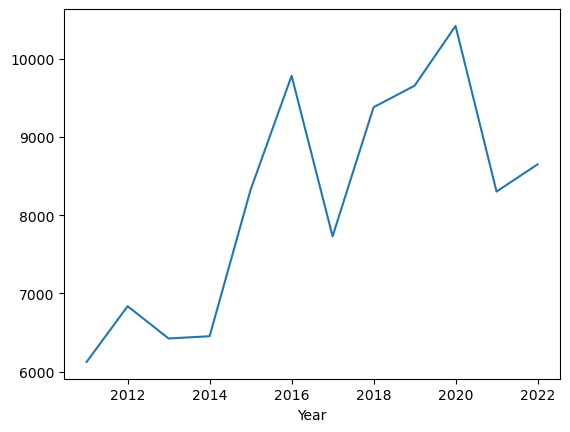

In [64]:
print("From Group 1")
serie_tmp = df1[df1["JobTitle"]=="PUBLIC SERVICE TRAINEE"].groupby("Year")["TotalPayBenefits"].mean()
print(serie_tmp)
serie_tmp.plot()

CAGR = (serie_tmp[2022]/serie_tmp[2011])**(1.0/11)-1
CAGR


From Group 1
Year
2012    6589.675521
2013    5270.199147
2014    5892.909463
2015    6730.177625
2016    8681.318889
2017    6634.407985
2018    7111.683162
2019    7596.445714
2020    2369.561649
2021    4471.870976
2022    9354.963953
Name: TotalPayBenefits, dtype: float64


0.03566144484025213

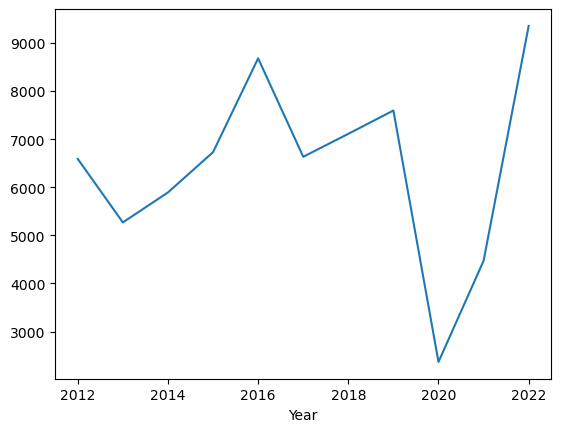

In [73]:
print("From Group 1")
serie_tmp = df1[df1["JobTitle"]=="POOL LIFEGUARD"].groupby("Year")["TotalPayBenefits"].mean()
print(serie_tmp)
serie_tmp.plot()

serie_tmp[2022]

CAGR = (serie_tmp[2022]/serie_tmp[2012])**(1.0/10)-1
CAGR





From Group 2
Year
2011    141363.611665
2012    193148.952454
2013    200393.859415
2014    188812.103821
2015    186193.051375
2016    177960.764277
2017    175059.082686
2018    174897.070455
2019    185803.794769
2020    200747.526587
2021    221594.415588
2022    222185.978111
Name: TotalPayBenefits, dtype: float64


0.04196381638870994

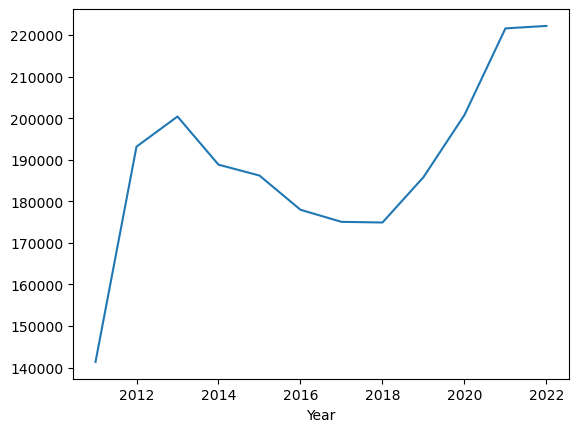

In [74]:
print("From Group 2")
serie_tmp = df2[df2["JobTitle"]=="FIREFIGHTER"].groupby("Year")["TotalPayBenefits"].mean()
print(serie_tmp)
serie_tmp.plot()

CAGR = (serie_tmp[2022]/serie_tmp[2011])**(1.0/11)-1
CAGR

## SCRAP BOOK

In [ ]:
df_trainee = df1[df1["JobTitle"] == "PUBLIC SERVICE TRAINEE"]
df_trainee

df_firefighter = df2[df2["JobTitle"] == "FIREFIGHTER"]
df_firefighter

In [81]:
current_df = df1[df1["Year"] == 2022]
#current_series = current_df.groupby("JobTitle")["Id"].nunique()
current_series = current_df.groupby("JobTitle")["Id"].nunique()
current_series

JobTitle
ACCOUNT CLERK                      5
ACCOUNTANT II                      1
ACCOUNTANT III                    11
ACCOUNTANT INTERN                 12
ACCOUNTANT IV                      1
                                  ..
WATER QUALITY TECHNICIAN           2
WATER SERVICE INSPECTOR            1
WATERSHED KEEPER                   6
WATERSHED WORKER (SEASONAL)       24
WORKER'S COMPENSATION ADJUSTER     4
Name: Id, Length: 513, dtype: int64

Group 1, CAGR = 0.28%
Group 2, CAGR = 5.45%
